# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [107]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw['APGAR5']

0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
27023     9.0
27024     9.0
27025    10.0
27026     9.0
27027     8.0
Name: APGAR5, Length: 27028, dtype: float64

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [8]:
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']].dropna()
sinasc_1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.892857,29.548701
Alto Alegre dos Parecis,24.679104,29.179104
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.825243,30.757282
Ariquemes,28.133333,32.466667
Buritis,24.750000,30.812500
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333
Cacoal,26.978605,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [27]:
sinasc_2 = sinasc_raw[['ESCMAE', 'PESO', 'SEXO', 'DTNASC']]
data_nascimento = '2019-01-02'

sinasc_2_filtrado = sinasc_2[sinasc_2['DTNASC'] == data_nascimento]

resultado = sinasc_2_filtrado.groupby(['ESCMAE','SEXO']).agg({'PESO':'mean',
                                                              'DTNASC': 'count'})

resultado.columns = ['PESO_MEDIO', 'TOTAL_BEBES_01_FEV']

resultado


PESO_MEDIO  TOTAL_BEBES_01_FEV
ESCMAE          SEXO                                      
1 a 3 anos      Masculino  2970.000000                   2
12 anos ou mais Feminino   2841.285714                   7
                Masculino  3169.363636                  11
4 a 7 anos      Feminino   3175.000000                   2
                Masculino  3550.285714                   7
8 a 11 anos     Feminino   3339.142857                  21
                Masculino  3468.437500                  16

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [29]:
sinasc_3 = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE', 'IDADEPAI']].dropna()

sinasc_3.groupby('munResNome').agg({'DTNASC': 'count',
                                    'IDADEMAE': 'mean',
                                    'IDADEPAI': 'mean'}).sort_values(by='DTNASC', ascending=True)

,DTNASC,IDADEMAE,IDADEPAI
munResNome,,,
Rio Crespo,1,26.000000,28.000000
Município ignorado - RO,1,24.000000,22.000000
Pimenteiras do Oeste,5,32.600000,35.600000
Alto Paraíso,6,22.833333,28.833333
Cabixi,6,32.166667,34.333333
Cacaulândia,6,31.000000,36.333333
Itapuã do Oeste,8,31.375000,42.500000
Governador Jorge Teixeira,9,25.555556,29.222222
Cujubim,10,27.400000,31.400000


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [34]:
sinasc_4 = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE', 'IDADEPAI']].dropna()
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'], errors='coerce')

mes_especifico = '2019-03'

sinasc_4_filtrado = sinasc_4[sinasc_4['DTNASC'].dt.strftime('%Y-%m') == mes_especifico]

resultado = sinasc_4_filtrado.groupby('munResNome').agg({
                                                         'DTNASC': 'count',
                                                         'IDADEMAE': ['mean', 'max', 'min'],
                                                         'IDADEPAI': ['mean', 'max', 'min']}).sort_values(by=('DTNASC', 'count'), ascending=False)

resultado

DTNASC   IDADEMAE           IDADEPAI            
                          count       mean max min       mean   max   min
munResNome                                                               
Cacoal                      122  26.442623  40  15  30.008197  47.0  17.0
Ji-Paraná                    95  26.768421  39  13  30.831579  56.0  16.0
Rolim de Moura               66  27.666667  41  18  31.257576  50.0  19.0
Porto Velho                  62  29.548387  44  17  34.629032  62.0  19.0
Pimenta Bueno                54  25.944444  39  15  29.611111  49.0  17.0
Ouro Preto do Oeste          40  25.625000  44  14  30.175000  57.0  19.0
Espigão D'Oeste              30  26.000000  43  16  30.666667  56.0  19.0
Buritis                      26  26.884615  42  16  32.115385  48.0  18.0
Alta Floresta D'Oeste        24  26.333333  35  18  30.125000  45.0  20.0
Vilhena                      16  28.750000  36  21  33.562500  47.0  27.0
Presidente Médici            14  26.928571  38  20  32.928571  60.0  24.0
Urupá                        13  27.000000  38  18  30.230769  47.0  22.0
Machadinho D'Oeste           13  27.846154  37  17  32.000000  40.0  23.0
Nova Mamoré                  11  25.363636  42  16  31.272727  43.0  19.0
Alvorada D'Oeste             10  28.000000  36  22  33.400000  42.0  26.0
Jaru                         10  30.700000  37  18  33.500000  41.0  21.0
Cerejeiras                    9  29.000000  33  25  31.222222  40.0  26.0
Alto Alegre dos Parecis       9  25.444444  36  17  29.222222  38.0  21.0
Campo Novo de Rondônia        8  21.625000  35  17  29.375000  40.0  21.0
Santa Luzia D'Oeste           7  23.285714  27  18  27.142857  37.0  19.0
Vale do Paraíso               6  23.666667  27  19  30.000000  46.0  19.0
Ministro Andreazza            6  27.166667  35  19  38.000000  47.0  27.0
Monte Negro                   6  24.500000  36  15  35.000000  55.0  22.0
Parecis                       5  29.600000  37  21  30.000000  40.0  24.0
Chupinguaia                   5  25.600000  36  17  29.000000  37.0  20.0
Novo Horizonte do Oeste       5  29.000000  37  19  30.400000  36.0  24.0
Colorado do Oeste             4  33.750000  37  32  38.750000  53.0  27.0
Castanheiras                  4  30.500000  35  27  36.000000  42.0  32.0
Primavera de Rondônia         4  28.000000  33  24  32.750000  35.0  27.0
São Felipe D'Oeste            4  23.250000  31  19  29.250000  32.0  27.0
Nova Brasilândia D'Oeste      3  26.666667  29  25  29.666667  35.0  25.0
Vale do Anari                 3  28.666667  34  24  32.000000  34.0  30.0
Ariquemes                     3  27.000000  31  22  28.666667  29.0  28.0
Teixeirópolis                 3  26.666667  32  21  27.000000  32.0  22.0
São Miguel do Guaporé         3  31.666667  42  22  33.666667  39.0  30.0
Nova União                    3  27.000000  38  21  27.333333  29.0  26.0
Seringueiras                  3  30.000000  34  26  30.333333  34.0  26.0
São Francisco do Guaporé      2  22.500000  30  15  29.500000  40.0  19.0
Theobroma                     2  22.000000  24  20  28.500000  31.0  26.0
Costa Marques                 2  26.500000  34  19  25.000000  31.0  19.0
Alto Paraíso                  2  25.500000  32  19  26.000000  29.0  23.0
Guajará-Mirim                 2  29.500000  39  20  34.500000  43.0  26.0
Mirante da Serra              2  26.500000  29  24  31.000000  32.0  30.0
Cujubim                       1  35.000000  35  35  39.000000  39.0  39.0
Corumbiara                    1  37.000000  37  37  37.000000  37.0  37.0
Itapuã do Oeste               1  28.000000  28  28  39.000000  39.0  39.0
Candeias do Jamari            1  21.000000  21  21  25.000000  25.0  25.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [46]:
sinasc_copy.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [86]:
sinasc_copy = sinasc_raw.copy()

sinasc_copy

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


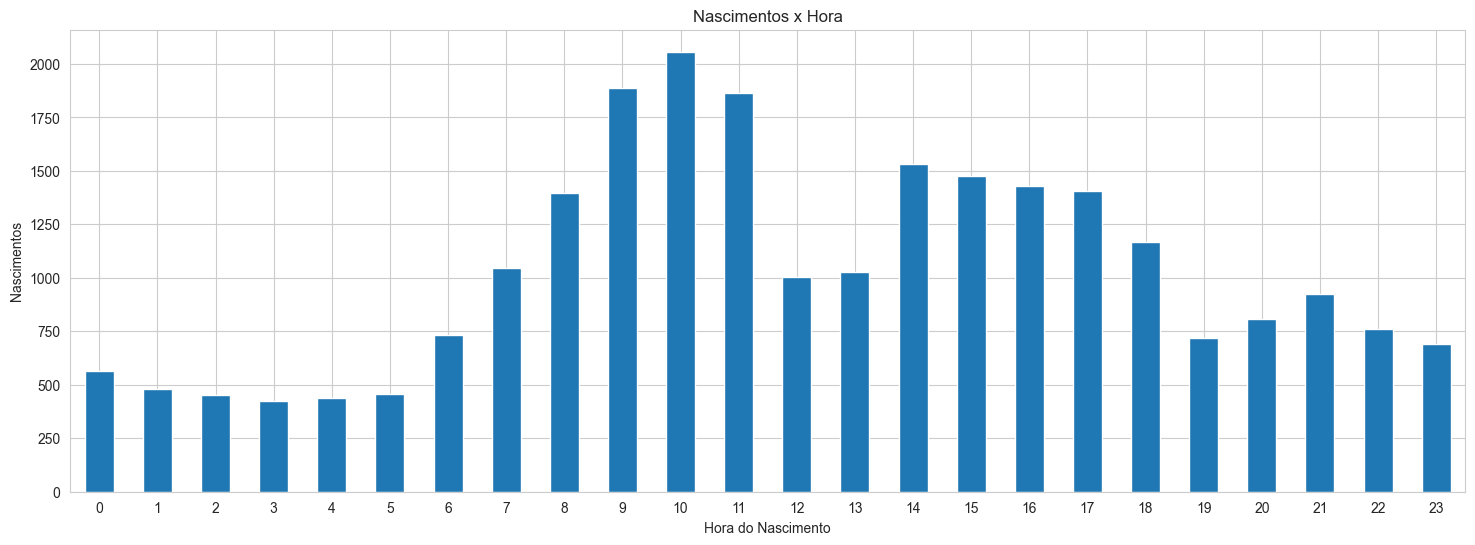

In [103]:
sinasc_6 = sinasc_copy[['HORANASC', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR5']].dropna()

sinasc_6['HORANASC'] = pd.to_datetime(sinasc_6['HORANASC'].astype(int).astype(str).str.zfill(4), format='%H%M').dt.time.replace(pd.NaT, None)

sinasc_6['HORANASC']


result = sinasc_6.groupby(sinasc_6['HORANASC'].apply(lambda x: x.hour))['QTDFILVIVO'].count()

result.plot(kind='bar', figsize=[18, 6], rot=0)
plt.xlabel('Hora do Nascimento')
plt.ylabel('Nascimentos')
plt.title('Nascimentos x Hora')
plt.show()

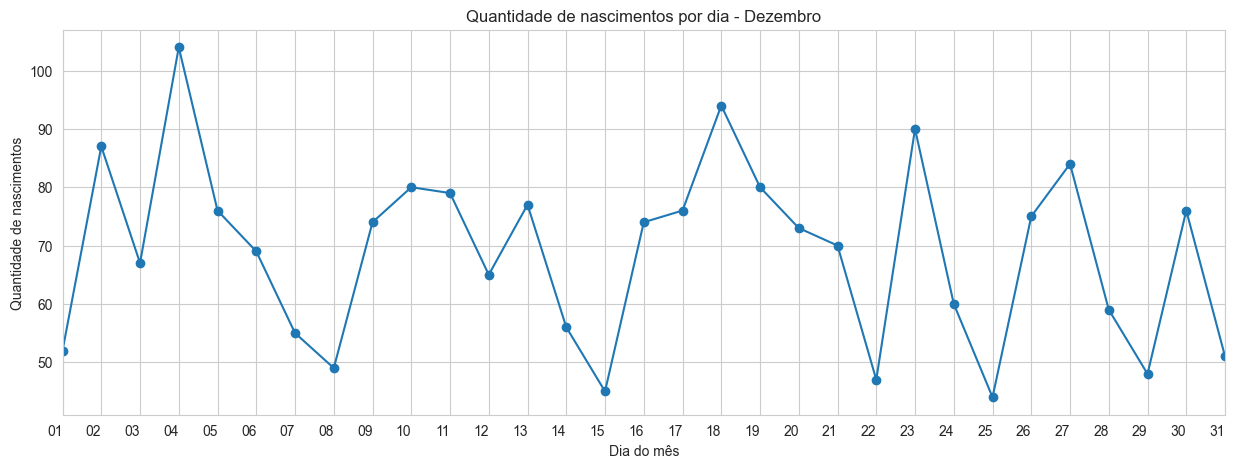

In [118]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

december = sinasc_raw[sinasc_raw['DTNASC'].dt.month==12]

result = december.groupby('DTNASC')['IDADEMAE'].count()


plt.figure(figsize=[15, 5])
result.plot(marker='o', linestyle='-')
plt.xticks(result.index, [d.strftime('%d') for d in result.index], ha='right')


plt.title('Quantidade de nascimentos por dia - Dezembro')
plt.xlabel('Dia do mês')
plt.ylabel('Quantidade de nascimentos')

plt.show()

Pouquíssimos partos nos dias 08, 15, 22, 25 e 29 e 31 de Dezembro, então podemos considerar pessoas nascidas nestas datas como pessoas que têm aniverários raros!

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')